In [422]:
#Importing all the required libraries
import pandas as pd #It makes working with structured data (like CSV files or database tables) easier. You can filter, transform, and analyze data easily using pandas.
import numpy as np #mathematical library #It helps with working on large sets of numbers efficiently, performing mathematical operations, and handling multi-dimensional arrays (like tables of numbers).
import sklearn # It provides machine learning tools and algorithms for tasks like classification, regression, clustering, and more. It helps you build and train machine learning models.
import matplotlib.pyplot as plt #It helps create visualizations such as line plots, scatter plots, and histograms. You can use it to represent your data visually.
import seaborn as sns #It builds on top of matplotlib and makes it simpler to create statistical visualizations with better aesthetics. It's useful for creating attractive plots like heatmaps, violin plots, and more.
import warnings as wr #Ignores the warnings
wr.filterwarnings('ignore')

In [423]:
df = pd.read_csv('mall customers.csv')

In [424]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [425]:
df.rename(columns={'Age':'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)': 'score'}, inplace=True)

In [426]:
df.head()

,CustomerID,Gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [427]:
df = df.drop('CustomerID', axis=1)

In [428]:
df.head()

,Gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [429]:
dfc=df.copy()
dfcc=df.copy()

In [430]:
dfc.head()

,Gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [431]:
dfcc.head()

,Gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Visualization**

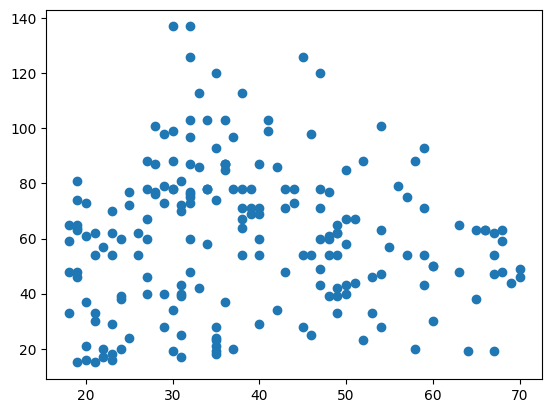

In [432]:
plt.scatter(df.age, df.income)

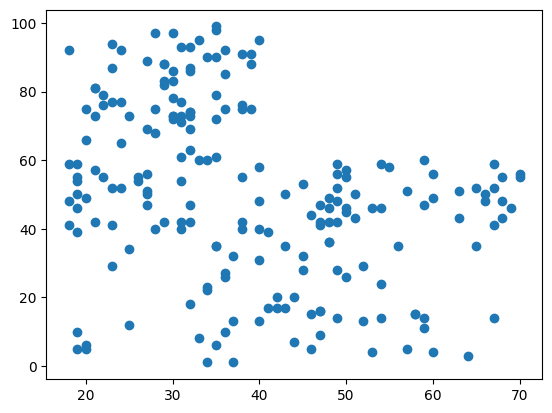

In [433]:
plt.scatter(df.age, df.score)

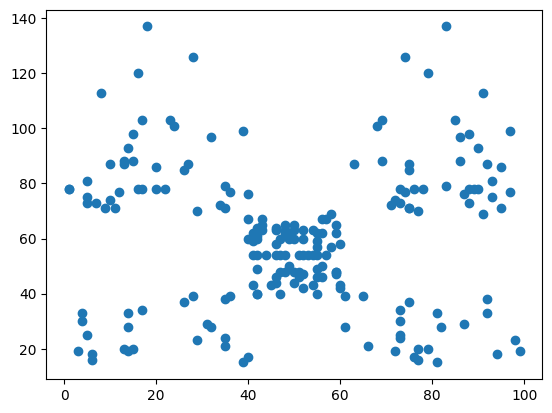

In [434]:
plt.scatter(df.score, df.income)

**Pair Plot**

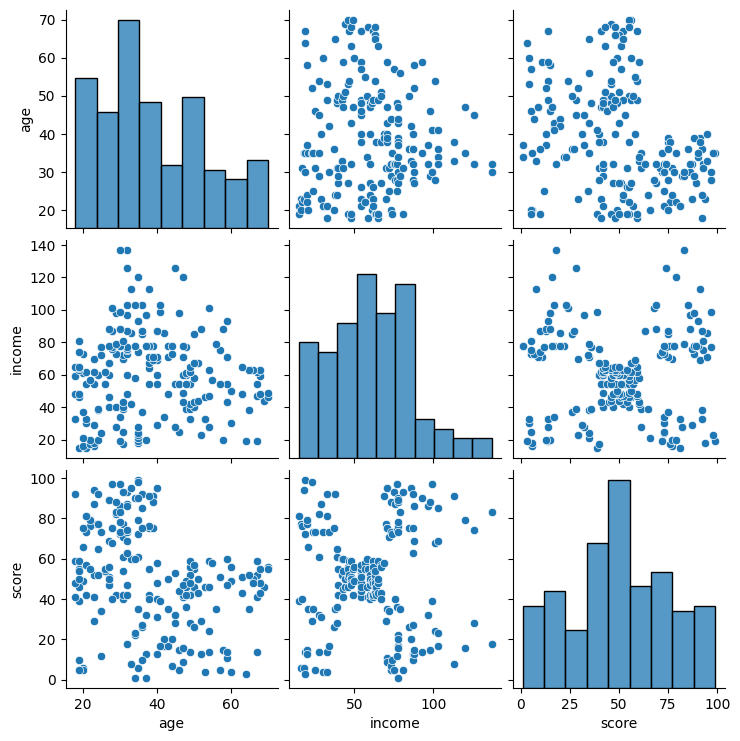

In [435]:
sns.pairplot(df[['age', 'income', 'score']])

Text(0, 0.5, 'income')

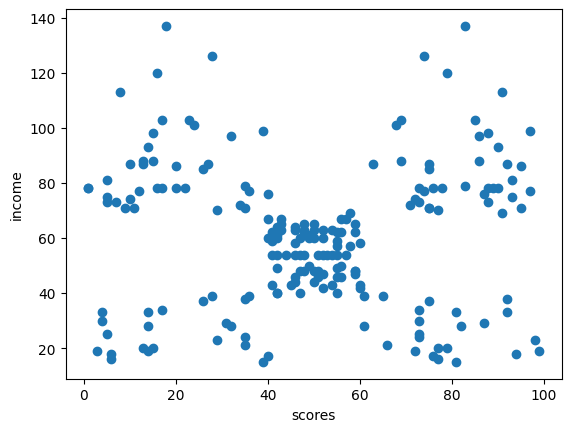

In [436]:
plt.scatter(df.score, df.income)
plt.xlabel('scores')
plt.ylabel('income')

**K-means Clustering**

In [437]:
import sklearn.cluster as cluster

In [438]:
kmeans = cluster.KMeans() # n_clusters=8 by default

In [439]:
predicted = kmeans.fit_predict(df[['income','score']]) #k-means fit & predict

In [440]:
df['predicted'] = predicted #the predicted inside third bracket is predicted clusters
df.head()

,Gender,age,income,score,predicted
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


In [441]:
centers = kmeans.cluster_centers_ #centroids
centers

array([[ 47.65909091,  51.61363636],
       [108.18181818,  82.72727273],
       [ 63.95238095,  46.21428571],
       [ 25.0952381 ,  80.04761905],
       [ 25.72727273,  20.22727273],
       [ 80.18181818,  12.68181818],
       [ 78.03571429,  81.89285714],
       [109.7       ,  22.        ]])

**Visualization**

In [442]:
#to separate data, we took df0-df7. in this way, we separated the 8 clusters.
df0 = df[df.predicted == 0] #df0 is for cluster 0
df1 = df[df.predicted == 1]
df2 = df[df.predicted == 2]
df3 = df[df.predicted == 3]
df4 = df[df.predicted == 4]
df5 = df[df.predicted == 5]
df6 = df[df.predicted == 6]
df7 = df[df.predicted == 7] #as n_clusters=8 by default, we took 0-7, total 8 clusters initially.

In [443]:
df0.head()

,Gender,age,income,score,predicted
42,Male,48,39,36,0
43,Female,31,39,61,0
45,Female,24,39,65,0
46,Female,50,40,55,0
47,Female,27,40,47,0


In [444]:
df0.shape

(44, 5)

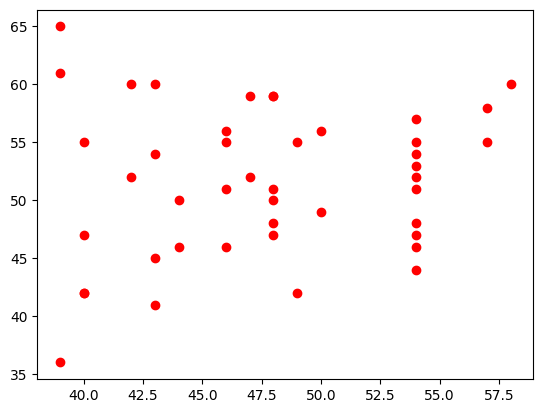

In [445]:
plt.scatter(df0.income , df0.score, color='red', label='cluster_0')

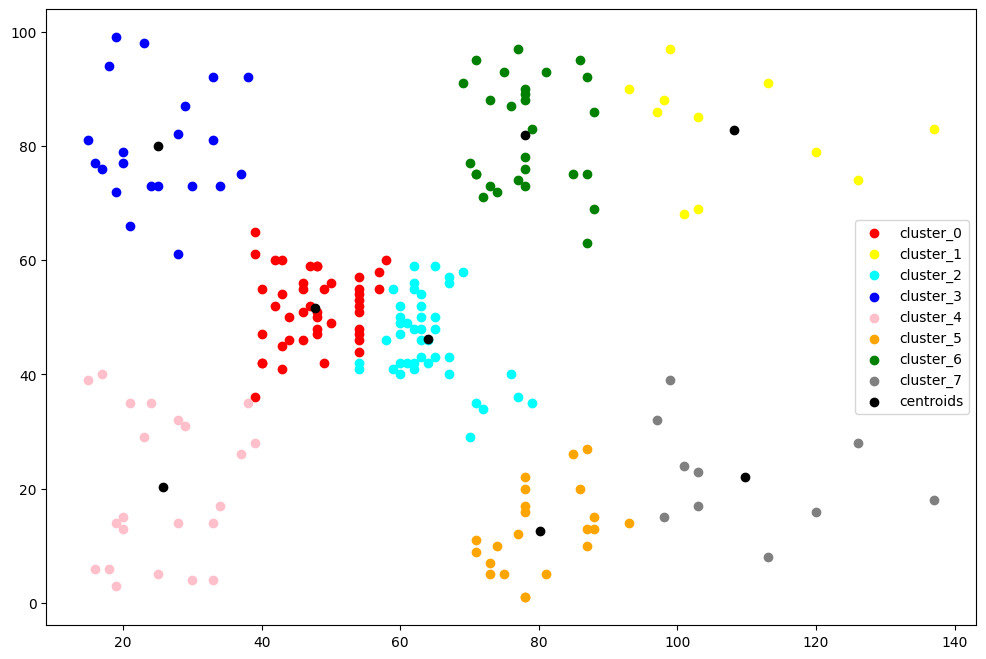

In [446]:
plt.figure(figsize=(12,8)) #width of 12 inches and a height of 8 inches.
plt.scatter(df0.income , df0.score, color='red', label='cluster_0')
plt.scatter(df1.income , df1.score, color='yellow', label='cluster_1')
plt.scatter(df2.income , df2.score, color='cyan', label='cluster_2')
plt.scatter(df3.income , df3.score, color='blue', label='cluster_3')
plt.scatter(df4.income , df4.score, color='pink', label='cluster_4')
plt.scatter(df5.income , df5.score, color='orange', label='cluster_5')
plt.scatter(df6.income , df6.score, color='green', label='cluster_6')
plt.scatter(df7.income , df7.score, color='gray', label='cluster_7')

plt.scatter(centers[:,0], centers[:,1], color='black', label='centroids')
#[:,0] means all row, 0 no. col
#[:,1] means all row, 1 no. col

plt.legend()

**Elbow Method to choose the optimal numbers of K in K-Means Clustering**

**For income & score**

In [447]:
wcss = []
# wcss -> sum of squared distance between each point & the centroid in a cluster.
#[] means blank list. for example, we get value for K=1,2,........,19 as the loop goes from 1 to 19.

clstr = range(1,20) #the loop goes from 1 to 19.

for k in clstr:
    km = cluster.KMeans(n_clusters=k)
    km.fit(df[['score', 'income']])
    wcss.append(km.inertia_) #sum of squared distance

In [448]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30227.606513152008,
 25388.76002817937,
 21850.165282585636,
 19657.78360870395,
 17712.76217707024,
 16016.378676544842,
 14264.768695356928,
 12982.913557735901,
 11817.189189514185,
 11080.8825113483,
 9995.893328223498,
 9359.941470265534,
 8780.3348395069]

Text(0.5, 0, 'Num of Clusters')

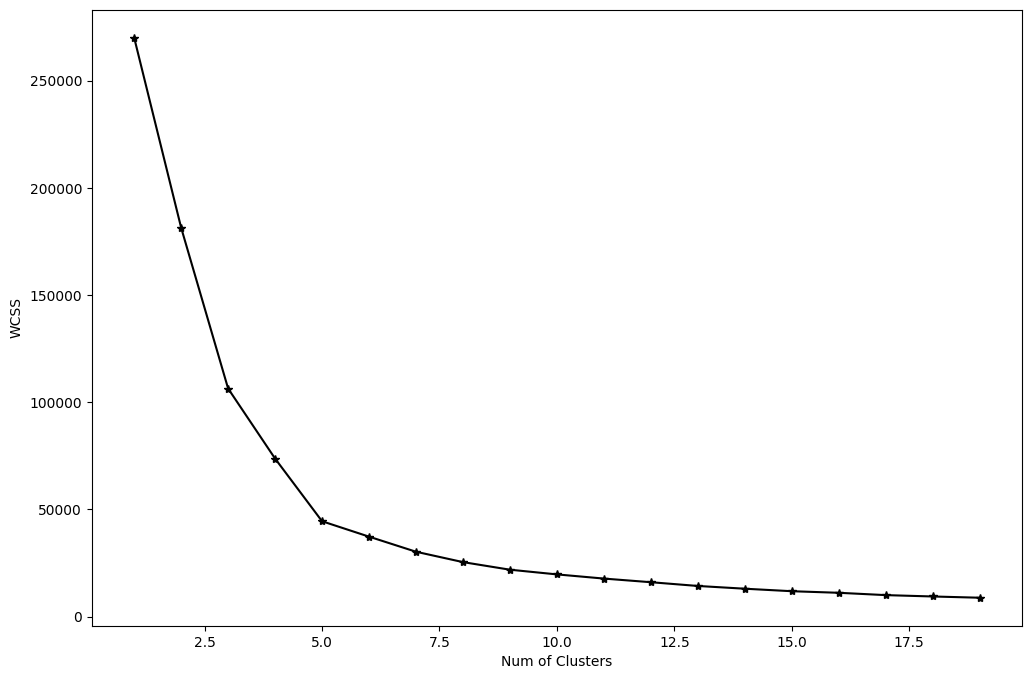

In [449]:
plt.figure(figsize=(12,8))
plt.plot(clstr, wcss, marker='*', color='black')
plt.ylabel('WCSS')
plt.xlabel('Num of Clusters')

**Plot Knee or Elbow**

In [450]:
pip install kneed


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [451]:
#plot knee
from kneed import KneeLocator
kn = KneeLocator(clstr, wcss, curve='convex',direction='decreasing')

#clstr: This is a sequence of numbers representing the x-values or the number of clusters you want to evaluate. In this# case, it is a range from 1 to 19.
#wcss: This is a sequence of numbers representing the y-values or the within-cluster sum of squares (WCSS) corresponding to each number of clusters. The WCSS is typically calculated as a measure of the compactness or the quality of clustering.
#curve='convex': This specifies the shape of the curve used to determine the knee point. In this case, it is set to 'convex', indicating that the curve is expected to have a convex shape.
#direction='decreasing': This indicates the direction in which the values are decreasing along the curve. Since I have specified 'decreasing', it means that the y-values (WCSS) are expected to decrease as the number of clusters increases.

In [452]:
kn

In [453]:
kn.elbow

5

In [454]:
kn.knee

5

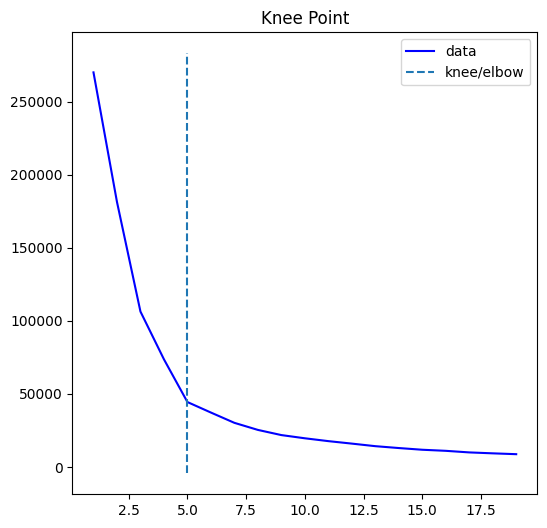

In [455]:
kn.plot_knee()

**After Elbow Method**

In [456]:
kmeans2 = cluster.KMeans(n_clusters=5)
predicted = kmeans2.fit_predict(df[['income','score']])
df['predicted'] = predicted
df.head()

,Gender,age,income,score,predicted
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


In [457]:
centers2 = kmeans2.cluster_centers_

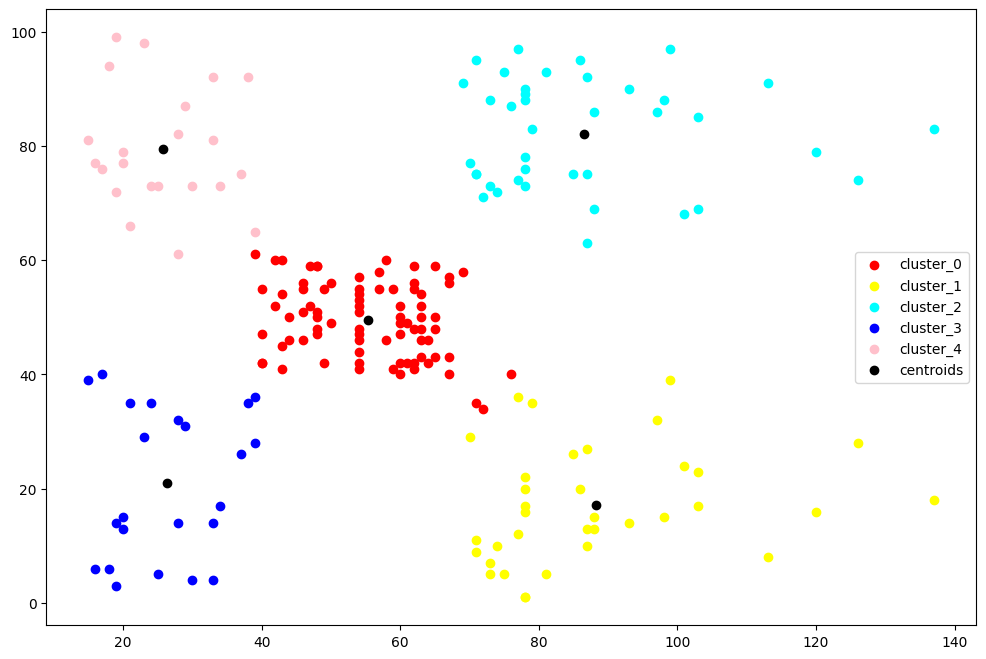

In [458]:
#now that we know the optimal value of k is 5, we only need 5 dfs. So we took df0-df4.

df0 = df[df.predicted == 0]
df1 = df[df.predicted == 1]
df2 = df[df.predicted == 2]
df3 = df[df.predicted == 3]
df4 = df[df.predicted == 4]

plt.figure(figsize=(12,8))
plt.scatter(df0.income , df0.score, color='red', label='cluster_0')
plt.scatter(df1.income , df1.score, color='yellow', label='cluster_1')
plt.scatter(df2.income , df2.score, color='cyan', label='cluster_2')
plt.scatter(df3.income , df3.score, color='blue', label='cluster_3')
plt.scatter(df4.income , df4.score, color='pink', label='cluster_4')

plt.scatter(centers2[:,0], centers2[:,1], color='black', label='centroids')

plt.legend()


**For age & income**

In [459]:
#elbow method

wcss = []

clstr = range(1,20) #the loop goes from 1 to 19.

for k in clstr:
    km = cluster.KMeans(n_clusters=k)
    km.fit(dfc[['age', 'income']])
    wcss.append(km.inertia_) #sum of squared distance

In [460]:
wcss

[176108.78000000003,
 87121.56591478697,
 59486.961439280356,
 39529.88796736351,
 31659.353138717823,
 25399.02200441699,
 22389.825752107467,
 18864.876029385057,
 15973.21653303218,
 13702.059618475534,
 12294.567805775238,
 11240.38296751981,
 10295.496817719528,
 9051.1507099181,
 8347.629841459075,
 7594.4232216899545,
 7184.232911170957,
 6581.460944944516,
 6154.120442962834]

Text(0, 0.5, 'WCSS')

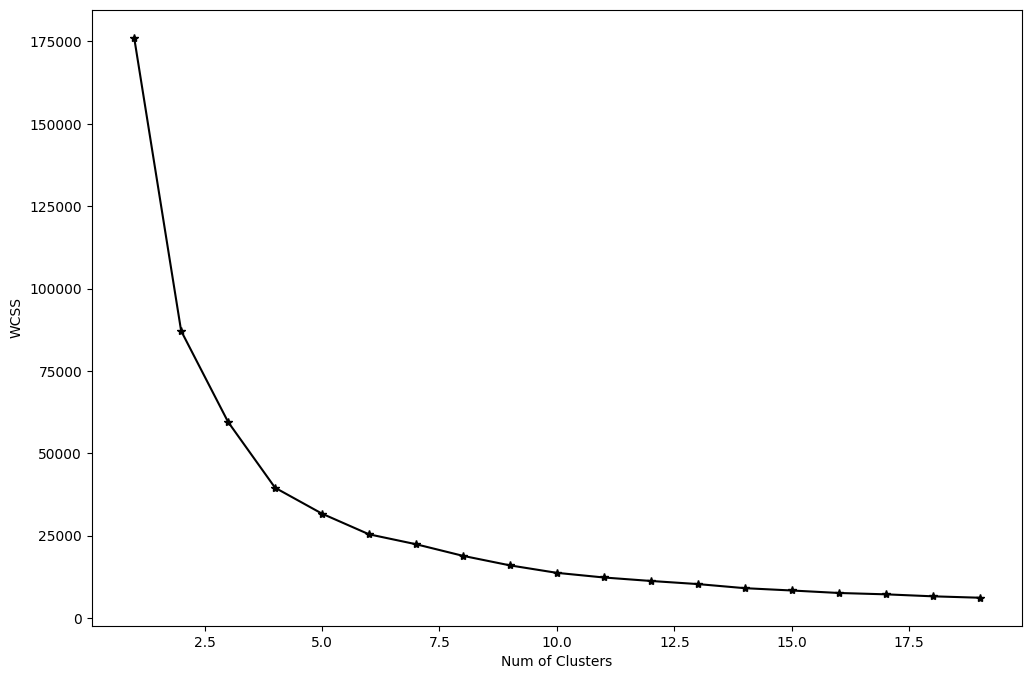

In [461]:
plt.figure(figsize=(12,8))
plt.plot(clstr, wcss, marker='*', color='black')
plt.xlabel('Num of Clusters')
plt.ylabel('WCSS')

In [462]:
#plot knee
from kneed import KneeLocator
kn = KneeLocator(clstr, wcss, curve='convex',direction='decreasing')

In [463]:
kn

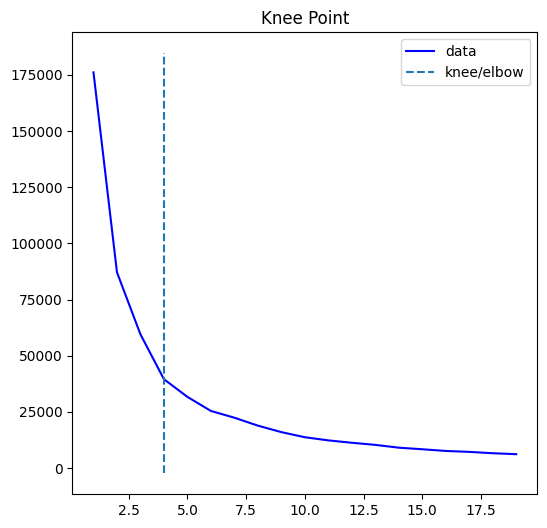

In [464]:
kn.plot_knee()

In [465]:
kn.knee

4

In [466]:
#after elbow method

kmeans3 = cluster.KMeans(n_clusters=4)
predicted = kmeans3.fit_predict(dfc[['age','income']])
dfc['predicted cluster'] = predicted
dfc.head()

,Gender,age,income,score,predicted cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [467]:
centers3 = kmeans3.cluster_centers_

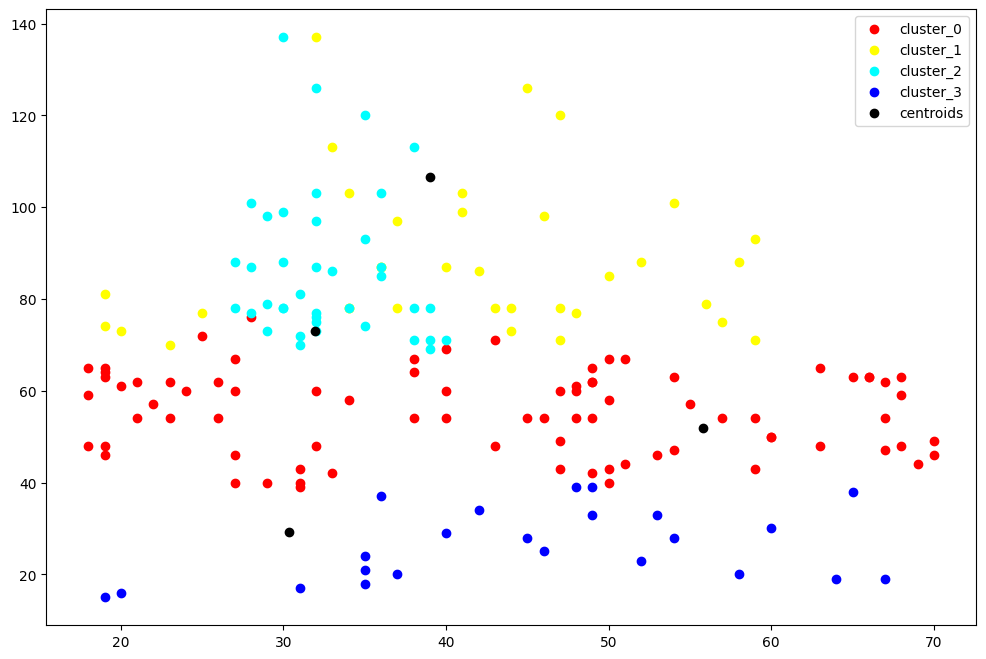

In [468]:
#now that we know the optimal value of k is 4, we only need 4 dfs. So we took df0-df3.

plt.figure(figsize=(12,8))
plt.scatter(df0.age , df0.income, color='red', label='cluster_0')
plt.scatter(df1.age , df1.income, color='yellow', label='cluster_1')
plt.scatter(df2.age , df2.income, color='cyan', label='cluster_2')
plt.scatter(df3.age , df3.income, color='blue', label='cluster_3')

plt.scatter(centers3[:,0], centers3[:,1], color='black', label='centroids')

plt.legend()

**For age & score**

In [469]:
#elbow method

wcss = []

clstr = range(1,20) #the loop goes from 1 to 19.

for k in clstr:
    km = cluster.KMeans(n_clusters=k)
    km.fit(dfcc[['age', 'score']])
    wcss.append(km.inertia_) #sum of squared distance


In [470]:
wcss


[171535.50000000003,
 75949.15601023019,
 45840.67661610866,
 28165.583566629342,
 23839.262483341663,
 19502.4078393622,
 15523.684014328752,
 13101.909042809042,
 11443.32420663676,
 10300.085647102496,
 9562.644453748006,
 8757.034033029984,
 7986.913960260013,
 7200.579034081559,
 6748.171567063825,
 6242.570141416889,
 5601.043166542779,
 5329.959637339782,
 4993.579402541901]

Text(0, 0.5, 'WCSS')

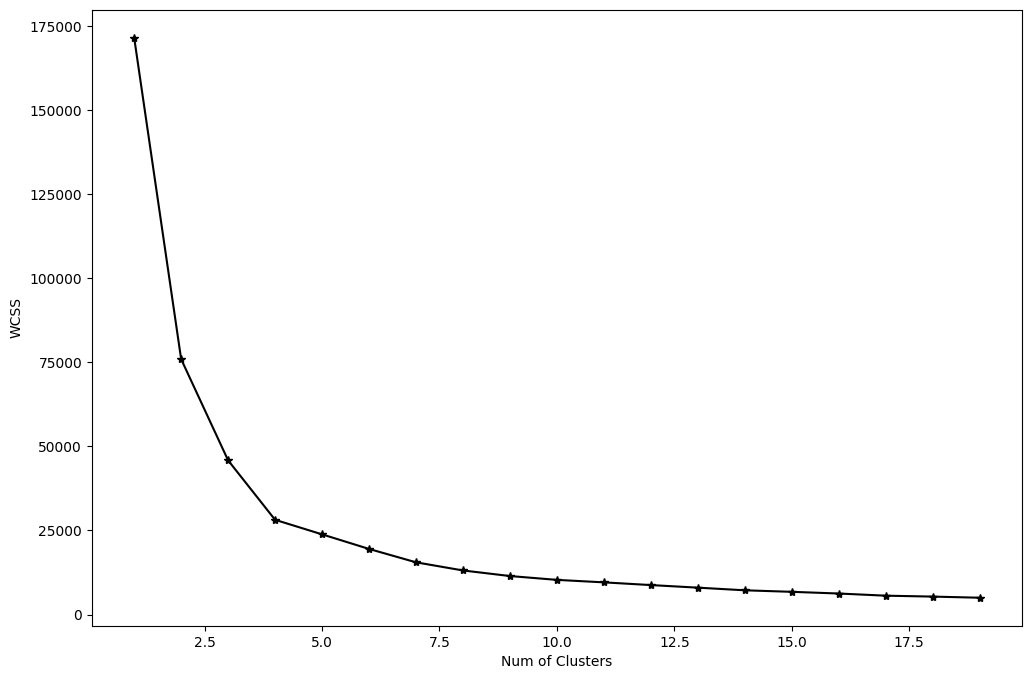

In [471]:
plt.figure(figsize=(12,8))
plt.plot(clstr, wcss, marker='*', color='black')
plt.xlabel('Num of Clusters')
plt.ylabel('WCSS')

In [472]:
#plot knee
from kneed import KneeLocator
kn = KneeLocator(clstr, wcss, curve='convex',direction='decreasing')

In [473]:
kn

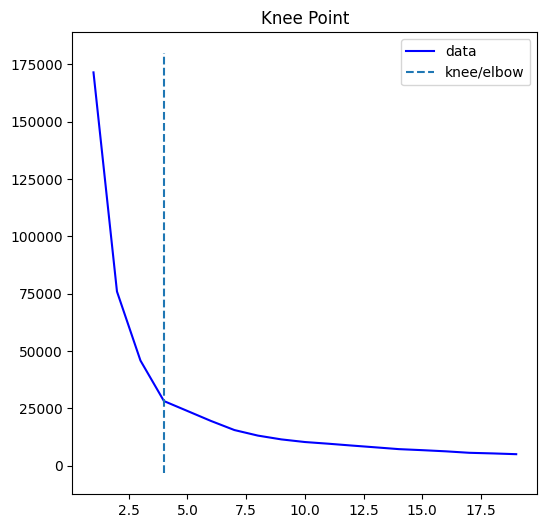

In [474]:
kn.plot_knee()

In [475]:
kn.knee

4

In [476]:
#after elbow method

kmeans4 = cluster.KMeans(n_clusters=4)
predicted = kmeans4.fit_predict(dfcc[['age','score']])
dfcc['predicted'] = predicted
dfcc.head()

,Gender,age,income,score,predicted
0,Male,19,15,39,2
1,Male,21,15,81,0
2,Female,20,16,6,1
3,Female,23,16,77,0
4,Female,31,17,40,2


In [477]:
centers4 = kmeans4.cluster_centers_

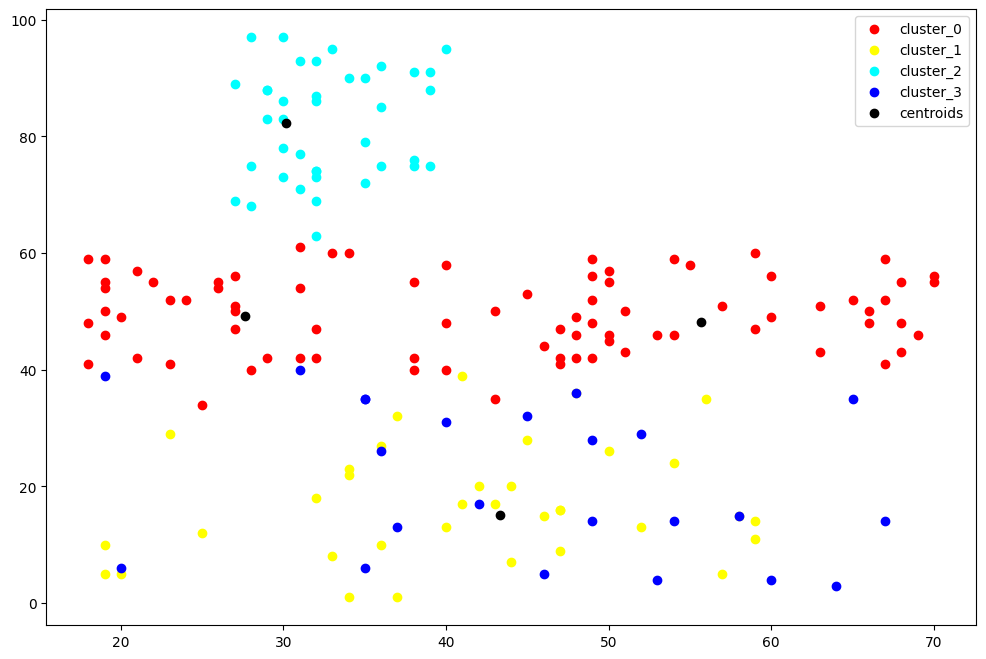

In [478]:
#now that we know the optimal value of k is 4, we only need 4 dfs. So we took df0-df3.

df0 = df[df.predicted == 0]
df1 = df[df.predicted == 1]
df2 = df[df.predicted == 2]
df3 = df[df.predicted == 3]

plt.figure(figsize=(12,8))
plt.scatter(df0.age , df0.score, color='red', label='cluster_0')
plt.scatter(df1.age , df1.score, color='yellow', label='cluster_1')
plt.scatter(df2.age , df2.score, color='cyan', label='cluster_2')
plt.scatter(df3.age , df3.score, color='blue', label='cluster_3')

plt.scatter(centers4[:,0], centers4[:,1], color='black', label='centroids')

plt.legend()
